# Objectives

# 1. Load the data
# 2. Sentiment Analysis and Tweet Length
# 3. Word Frequency and Word Cloud
# 4. Trends over Time

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud
from collections import Counter
import datetime as dt

In [48]:
# Load the Dataset
data_path = '../data/raw/raw_tweets.csv'
df = pd.read_csv(data_path, encoding='latin-1', header=None)
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Inspect the Data
print("Dataset Info:")
print(df.info())
print("\nFirst Five Rows:")
print(df.head())
print("\nSentiment Counts:")
print(df['sentiment'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None

First Five Rows:
   sentiment          id                          date     query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                             

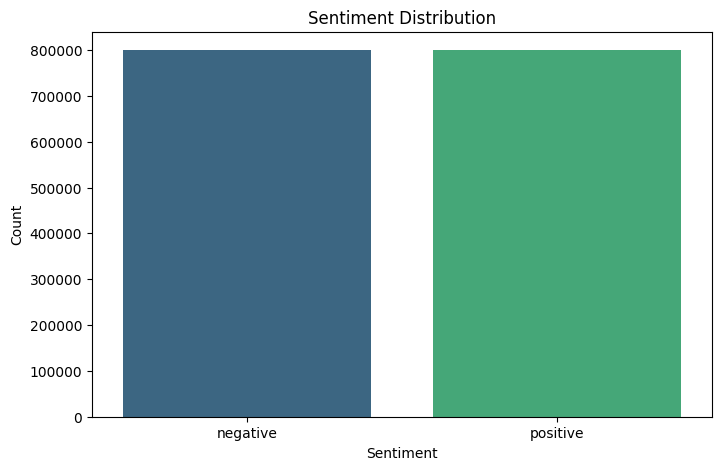

In [36]:
# Map Sentiments (0: Negative, 4: Positive)
df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})

# Plot Sentiment Distribution
plt.figure(figsize=(8, 5))
sb.countplot(x='sentiment', data=df, palette='viridis', hue='sentiment', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


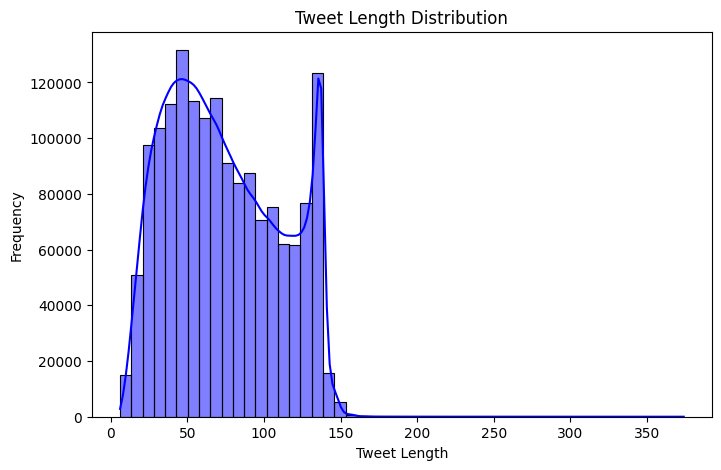

In [ ]:
# Analyze Tweet Lengths
df['tweet_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 5))
sb.histplot(df['tweet_length'], kde=True, bins=50, color='blue')
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()



Top 20 Words:
[('to', 552962), ('I', 496619), ('the', 487501), ('a', 366212), ('my', 280025), ('and', 275263), ('i', 250016), ('is', 217693), ('you', 213871), ('for', 209801), ('in', 202294), ('of', 179554), ('it', 171812), ('on', 154365), ('have', 132249), ('so', 125155), ('me', 122509), ('that', 118685), ('with', 110843), ('be', 108069)]


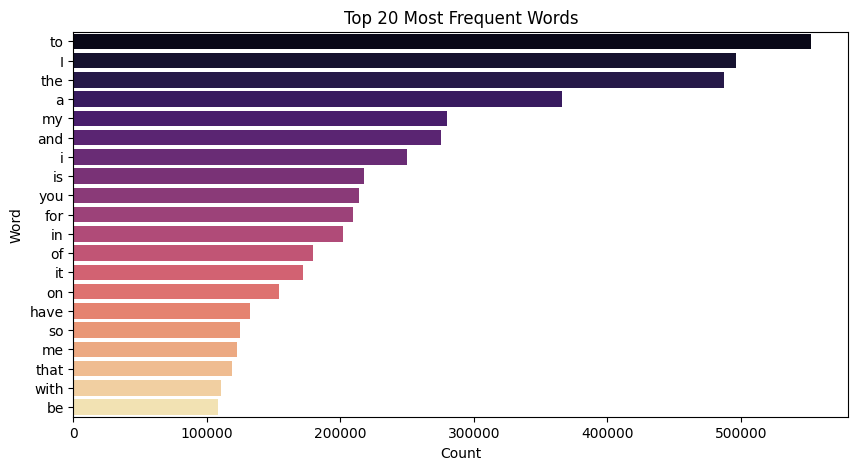

In [38]:
# Word Frequency Analysis
def get_word_frequencies(texts):
    all_words = ' '.join(texts).split()
    word_freq = Counter(all_words).most_common(20)
    return word_freq

word_freq = get_word_frequencies(df['text'])
print("\nTop 20 Words:")
print(word_freq)

# Visualize Word Frequency
top_words, top_counts = zip(*word_freq)
plt.figure(figsize=(10, 5))
sb.barplot(x=list(top_counts), y=list(top_words), palette='magma', hue=top_words, legend=False)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

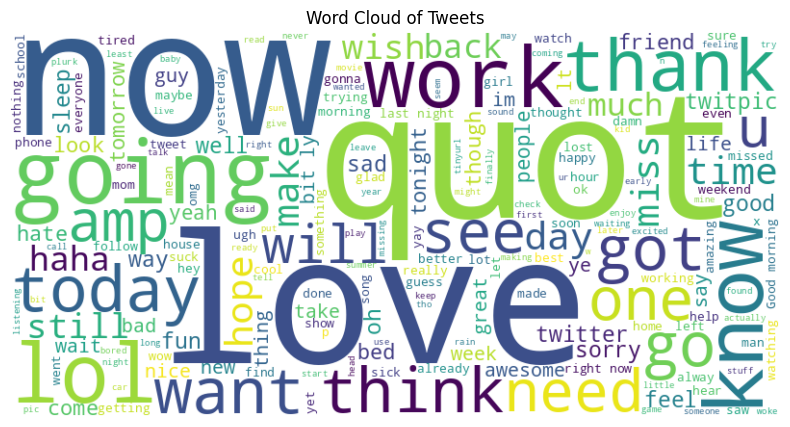

In [39]:
# Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

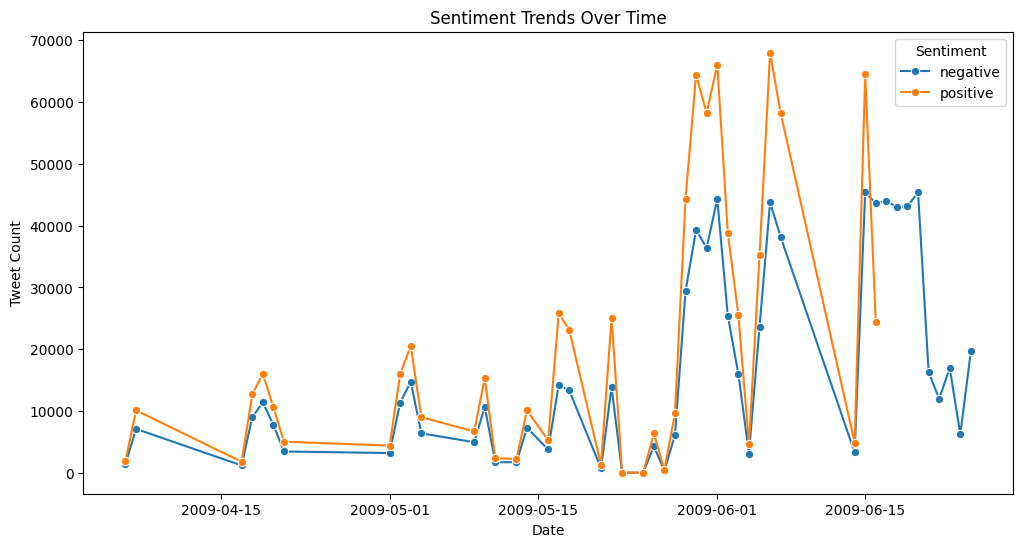

In [41]:
# Sentiment Trends Over Time
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_only'] = df['date'].dt.date

# Group by Date
sentiment_trend = df.groupby(['date_only', 'sentiment']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sb.lineplot(data=sentiment_trend, x='date_only', y='count', hue='sentiment', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.show()